In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import sys
sys.path.append("../")
from pyACC.cosmology.calcolodistanzedesi import Distances 

1° GRAFICO: ISOTROPIC BAO

In [74]:
# Dati estratti dalla tabella
z_values = np.array([0.295, 0.510, 0.706, 0.934, 1.321, 1.484, 2.330])  # valori di redshift z
alpha_iso_values = np.array([0.9857, 0.9911, 0.9749, 0.9886, 0.9911, 1.0032, 0.9971])  # valori di alpha_iso
alpha_iso_errors = np.array([0.0093, 0.0077, 0.0067, 0.0046, 0.0071, 0.0153, 0.0082])  # errori di alpha_iso


In [75]:
def hubble(z, Omega_m, H0, w0, wa):
    w_z=w0 + wa * z / (1 + z)
    return H0 * np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m) * (1 + z)**(3*(1 + w_z)))

r_d=147.05

#modelli cosmologici da tabella 
dist_CMB=Distances(hubble,0.3169,67.14,-1,0.0)#black
dist_DESI=Distances(hubble,0.2975,69,-1,0.0)#blue
dist_DESI_CMB=Distances(hubble,0.3027,68.17,-1,0.0)#purple
dist_wCDM_DESI_CMB_DESY5=Distances(hubble,0.3098,67.34,-0.971,0.0)#lightblue
dist_w0wa_DESI_DESY5=Distances(hubble,0.319,69,-0.781,-0.72)#green
dist_w0wa_DESI_CMB_DESY5=Distances(hubble,0.3191,66.74,-0.752,-0.86)#red 

#dist_w0wa_DESI_DESY5=Distances(hubble,0.319,69,-0.781,0.0)#green
#dist_w0wa_DESI_CMB_DESY5=Distances(hubble,0.3191,66.74,-0.752,0.0)#red 


z_vals=np.linspace(0.02, 3, 1000)

dv_LambdaCDM_CMB=[(dist_CMB.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
dv_DESI=[(dist_DESI.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
dv_DESI_CMB=[(dist_DESI_CMB.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
#dv_DESY5=[(dist_DESY5.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
dv_w0wa_DESI_DESY5=[(dist_w0wa_DESI_DESY5.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
dv_w0wa_DESI_CMB_DESY5=[(dist_w0wa_DESI_CMB_DESY5.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]
dv_wCDM_DESI_CMB_DESY5=[(dist_wCDM_DESI_CMB_DESY5.volume_distance(z))/(dist_CMB.volume_distance(z)) for z in z_vals]

dm_LambdaCDM_CMB=[(dist_CMB.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]
dm_DESI=[(dist_DESI.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]
dm_DESI_CMB=[(dist_DESI_CMB.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]
#dm_DESY5=[(dist_DESY5.angular_diameter_distance(z))/(dist_CMB.angular_diameter_distance(z)) for z in z_vals]
dm_w0wa_DESI_DESY5=[(dist_w0wa_DESI_DESY5.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]
dm_w0wa_DESI_CMB_DESY5=[(dist_w0wa_DESI_CMB_DESY5.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]
dm_wCDM_DESI_CMB_DESY5=[(dist_wCDM_DESI_CMB_DESY5.transverse_comoving_distance(z))/(dist_CMB.transverse_comoving_distance(z)) for z in z_vals]

dh_LambdaCDM_CMB=[(dist_CMB.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
dh_DESI=[(dist_DESI.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
dh_DESI_CMB=[(dist_DESI_CMB.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
#dh_DESY5=[(dist_DESY5.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
dh_w0wa_DESI_DESY5=[(dist_w0wa_DESI_DESY5.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
dh_w0wa_DESI_CMB_DESY5=[(dist_w0wa_DESI_CMB_DESY5.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]
dh_wCDM_DESI_CMB_DESY5=[(dist_wCDM_DESI_CMB_DESY5.hubble_distance(z))/(dist_CMB.hubble_distance(z)) for z in z_vals]

<>:12: SyntaxWarning: invalid escape sequence '\L'
<>:12: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_32979/2364562709.py:12: SyntaxWarning: invalid escape sequence '\L'
  plt.ylabel("$D_V(z)/D_V^{\Lambda CDM}(z)$")


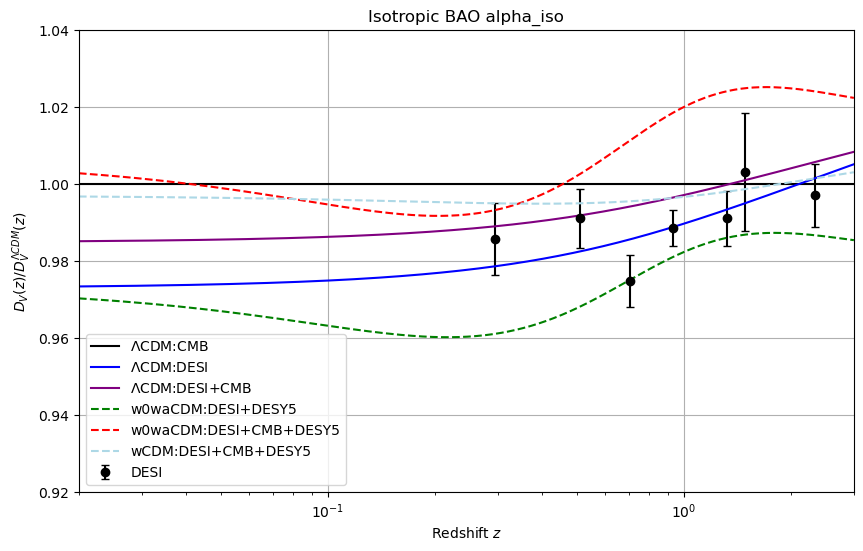

In [76]:
plt.figure(figsize=(10, 6))
plt.errorbar(z_values, alpha_iso_values, yerr=alpha_iso_errors, fmt='o', color='black', label="DESI", capsize=3)
plt.plot(z_vals, dv_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
plt.plot(z_vals, dv_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
plt.plot(z_vals, dv_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#plt.plot(z_vals, dv_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
plt.plot(z_vals, dv_w0wa_DESI_DESY5, label='w0waCDM:DESI+DESY5', color='green', linestyle='--')
plt.plot(z_vals, dv_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
plt.plot(z_vals, dv_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
plt.xscale('log')
plt.xlabel("Redshift $z$")
plt.ylabel("$D_V(z)/D_V^{\Lambda CDM}(z)$")
plt.xlim(0.02, 3)
plt.ylim(0.92, 1.04)
plt.title("Isotropic BAO alpha_iso")
plt.legend()
plt.grid(True)
plt.show()


2° GRAFICO: PERPENDICULAR BAO

In [77]:
z_eff = np.array([0.510, 0.706, 0.934, 1.321, 1.484, 2.330])
DM_over_rd_meas = np.array([13.588, 17.351,21.576, 27.601,30.512,38.988])
DM_over_rd_err = np.array([0.167, 0.177, 0.152, 0.318, 0.760, 0.531])
r_d = 147.05  # Mpc

DM_fid = np.array([dist_CMB.comoving_distance(z) for z in z_eff])
DM_over_rd_fid = DM_fid / r_d
alpha_per = DM_over_rd_meas / DM_over_rd_fid
#alpha_per_err = alpha_per * (DM_over_rd_err / DM_over_rd_meas)
# Calcolo alpha_per con propagazione corretta degli errori
alpha_per_err = alpha_per * np.sqrt((DM_over_rd_err / DM_over_rd_meas)**2 +  (0 / DM_over_rd_fid)**2)


# Stampa
print("z\par_fid\t+/- error")
for z, val, err in zip(z_eff, DM_over_rd_fid, DM_over_rd_err):
    print(f"{z:.3f}\t{val:.4f} \t± {err:.4f}")

# Stampa
print("z\talpha_perp\t+/- error")
for z, val, err in zip(z_eff, alpha_per, alpha_per_err):
    print(f"{z:.3f}\t{val:.4f} \t± {err:.4f}")

z\par_fid	+/- error
0.510	13.5417 	± 0.1670
0.706	17.7518 	± 0.1770
0.934	22.0548 	± 0.1520
1.321	28.1528 	± 0.3180
1.484	30.3503 	± 0.7600
2.330	39.2706 	± 0.5310
z	alpha_perp	+/- error
0.510	1.0034 	± 0.0123
0.706	0.9774 	± 0.0100
0.934	0.9783 	± 0.0069
1.321	0.9804 	± 0.0113
1.484	1.0053 	± 0.0250
2.330	0.9928 	± 0.0135


<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_32979/2173545364.py:15: SyntaxWarning: invalid escape sequence '\p'
  print("z\par_fid\t+/- error")


<>:13: SyntaxWarning: invalid escape sequence '\L'
<>:13: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_32979/3473582581.py:13: SyntaxWarning: invalid escape sequence '\L'
  plt.ylabel("$D_M(z)/D_M^{\Lambda CDM}(z)$")


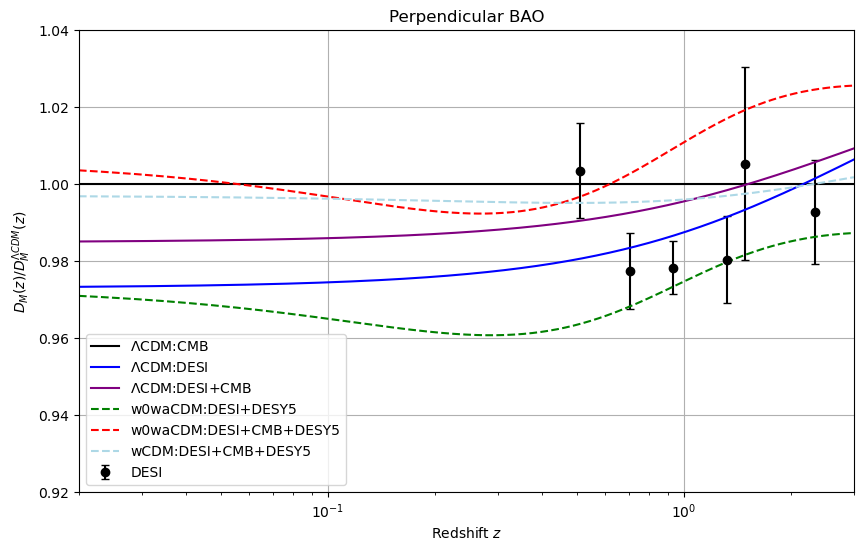

In [78]:
plt.figure(figsize=(10, 6))
plt.errorbar(z_eff[0:], alpha_per[0:], yerr=alpha_per_err[0:], fmt='o', color='black',label=r'DESI', capsize=3)
plt.plot(z_vals, dm_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
plt.plot(z_vals, dm_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
plt.plot(z_vals, dm_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#plt.plot(z_vals, dv_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
plt.plot(z_vals, dm_w0wa_DESI_DESY5, label='w0waCDM:DESI+DESY5', color='green', linestyle='--')
plt.plot(z_vals, dm_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
plt.plot(z_vals, dm_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel("Redshift $z$")
plt.ylabel("$D_M(z)/D_M^{\Lambda CDM}(z)$")
plt.xlim(0.02, 3)
plt.ylim(0.92, 1.04)  
plt.title("Perpendicular BAO")
plt.legend()
plt.grid(True)
plt.show()

3° GRAFICO: PARALLEL BAO

In [79]:
z_eff = np.array([0.510, 0.706, 0.934, 1.321, 1.484, 2.330])
DH_over_rd_meas = np.array([21.863,19.455, 17.641, 14.176, 12.817, 8.632])
DH_over_rd_err = np.array([0.425,0.330, 0.193, 0.221, 0.516, 0.101])

r_d = 147.05  # Mpc
DH_fid = np.array([dist_CMB.hubble_distance(z) for z in z_eff])
DH_over_rd_fid = DH_fid / r_d
alpha_par = DH_over_rd_meas / DH_over_rd_fid
#alpha_par_err = alpha_par * (DH_over_rd_err / DH_over_rd_meas)
alpha_par_err = alpha_par * np.sqrt((DH_over_rd_err / DH_over_rd_meas)**2 +  (0 / DH_over_rd_fid)**2)                 

print("z\talpha_par\t+/- error")
for z, val, err in zip(z_eff, alpha_par, alpha_par_err):
    print(f"{z:.3f}\t{val:.4f} \t± {err:.4f}")


z	alpha_par	+/- error
0.510	0.9590 	± 0.0186
0.706	0.9625 	± 0.0163
0.934	1.0021 	± 0.0110
1.321	1.0062 	± 0.0157
1.484	0.9935 	± 0.0400
2.330	1.0004 	± 0.0117


<>:14: SyntaxWarning: invalid escape sequence '\L'
<>:14: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_32979/1013314927.py:14: SyntaxWarning: invalid escape sequence '\L'
  plt.ylabel("$D_H(z)/D_H^{\Lambda CDM}(z)$")


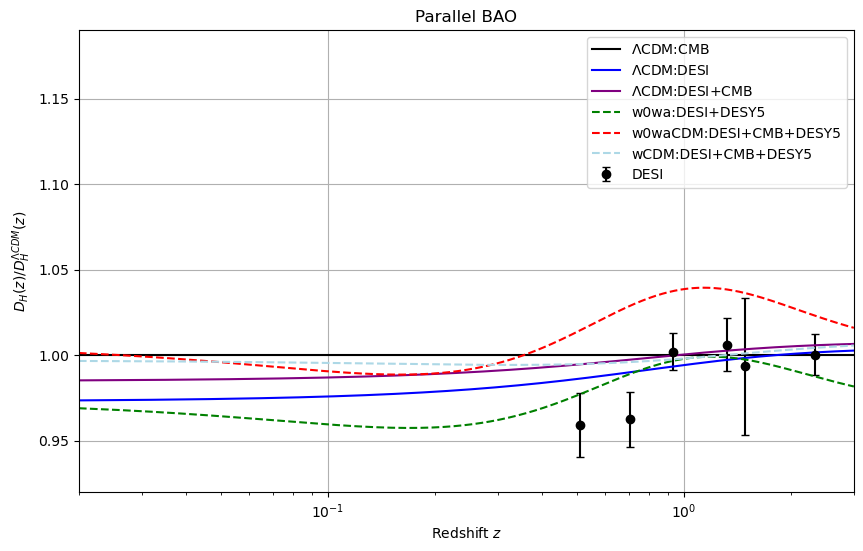

In [80]:
plt.figure(figsize=(10, 6))
plt.errorbar(z_eff[0:], alpha_par[0:], yerr=alpha_par_err[0:], fmt='o', color='black',label=r'DESI', capsize=3)
#plt.errorbar(z_values, alpha_par_values, yerr=alpha_par_errors, fmt='o', color='black', label="DESI", capsize=3)
plt.plot(z_vals, dh_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
plt.plot(z_vals, dh_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
plt.plot(z_vals, dh_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#plt.plot(z_vals, dv_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
plt.plot(z_vals, dh_w0wa_DESI_DESY5, label='w0wa:DESI+DESY5', color='green', linestyle='--')
plt.plot(z_vals, dh_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
plt.plot(z_vals, dh_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel("Redshift $z$")
plt.ylabel("$D_H(z)/D_H^{\Lambda CDM}(z)$")
plt.xlim(0.02, 3)
plt.ylim(0.92, 1.19)  
plt.title("Parallel BAO")
plt.legend()
plt.grid(True)
plt.show()

RIASSUMO I 3 GRAFICI

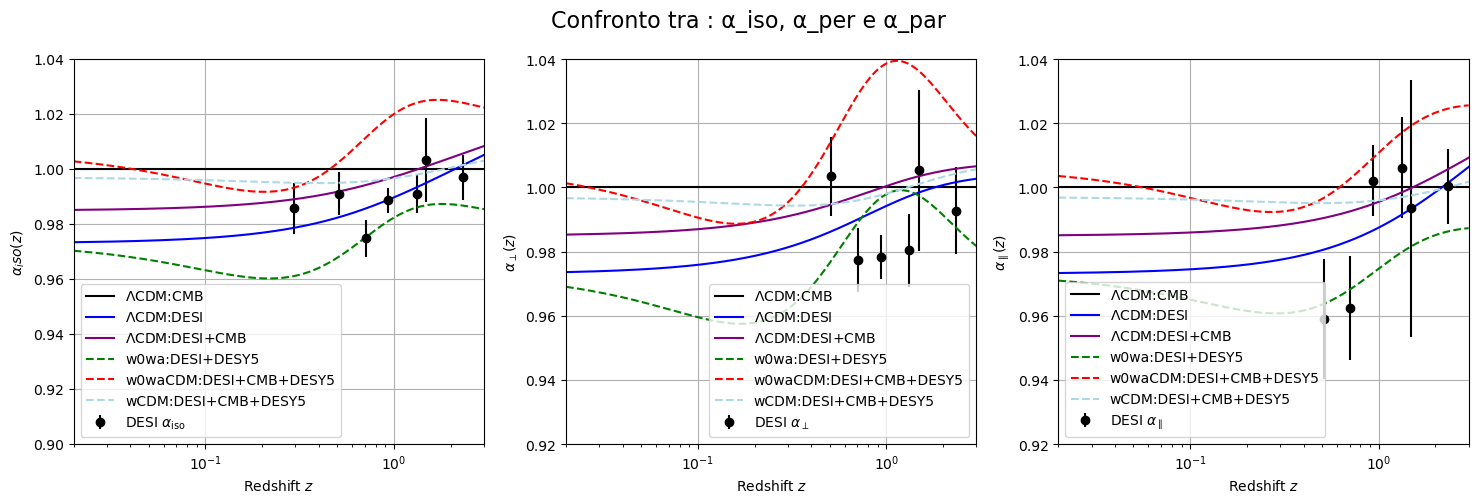

In [81]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
axes[0].errorbar(z_values, alpha_iso_values, yerr=alpha_iso_errors, fmt='o', color='black', label=r'DESI $\alpha_{\rm iso}$')
axes[0].set_ylabel(r"$\alpha_iso(z)$")
axes[0].set_xlabel("Redshift $z$")
axes[0].set_xlim(0.02, 3)
axes[0].set_ylim(0.9, 1.04)
axes[0].plot(z_vals, dv_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
axes[0].plot(z_vals, dv_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
axes[0].plot(z_vals, dv_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#axes[1].plot(z_vals, dv_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
axes[0].plot(z_vals, dv_w0wa_DESI_DESY5, label='w0wa:DESI+DESY5', color='green', linestyle='--')
axes[0].plot(z_vals, dv_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
axes[0].plot(z_vals, dv_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
axes[0].set_xscale('log')
axes[0].legend()
axes[0].grid(True)


axes[1].errorbar(z_eff[0:], alpha_per[0:], yerr=alpha_per_err[0:], fmt='o', color='black', label=r'DESI $\alpha_\perp$')
axes[1].set_ylabel(r"$\alpha_\perp(z)$")
axes[1].set_xlabel("Redshift $z$")
axes[1].set_xlim(0.02, 3)
axes[1].set_ylim(0.92, 1.04)
axes[1].plot(z_vals, dh_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
axes[1].plot(z_vals, dh_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
axes[1].plot(z_vals, dh_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#axes[1].plot(z_vals, dv_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
axes[1].plot(z_vals, dh_w0wa_DESI_DESY5, label='w0wa:DESI+DESY5', color='green', linestyle='--')
axes[1].plot(z_vals, dh_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
axes[1].plot(z_vals, dh_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
axes[1].set_xscale('log')
axes[1].legend()
axes[1].grid(True)

axes[2].errorbar(z_eff[0:], alpha_par[0:], yerr=alpha_par_err[0:], fmt='o', color='black', label=r'DESI $\alpha_\parallel$')
axes[2].set_ylabel(r"$\alpha_\parallel(z)$")
axes[2].set_xlabel("Redshift $z$")
axes[2].set_xlim(0.02, 3)
axes[2].set_ylim(0.92, 1.04) 
axes[2].plot(z_vals, dm_LambdaCDM_CMB, label=r'$\Lambda$CDM:CMB', color='black')
axes[2].plot(z_vals, dm_DESI, label=r'$\Lambda$CDM:DESI', color='blue')
axes[2].plot(z_vals, dm_DESI_CMB, label=r'$\Lambda$CDM:DESI+CMB', color='purple')
#axes[2].plot(z_vals, dm_DESY5, label=r'$\Lambda$CDM:DESY5', color='orange')
axes[2].plot(z_vals, dm_w0wa_DESI_DESY5, label='w0wa:DESI+DESY5', color='green', linestyle='--')
axes[2].plot(z_vals, dm_w0wa_DESI_CMB_DESY5, label='w0waCDM:DESI+CMB+DESY5', color='red', linestyle='--')
axes[2].plot(z_vals, dm_wCDM_DESI_CMB_DESY5, label='wCDM:DESI+CMB+DESY5', color='lightblue', linestyle='--')
axes[2].set_xscale('log')
axes[2].legend()
axes[2].grid(True)




plt.suptitle("Confronto tra : α_iso, α_per e α_par", fontsize=16)
plt.show()


